In [12]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


Размеры 3D записи:
INLINE_3D: от 100 до 750
CROSSLINE_3D: от 300 до 1250
Количество сэмплов: 463
Выбран срез INLINE_3D = 425


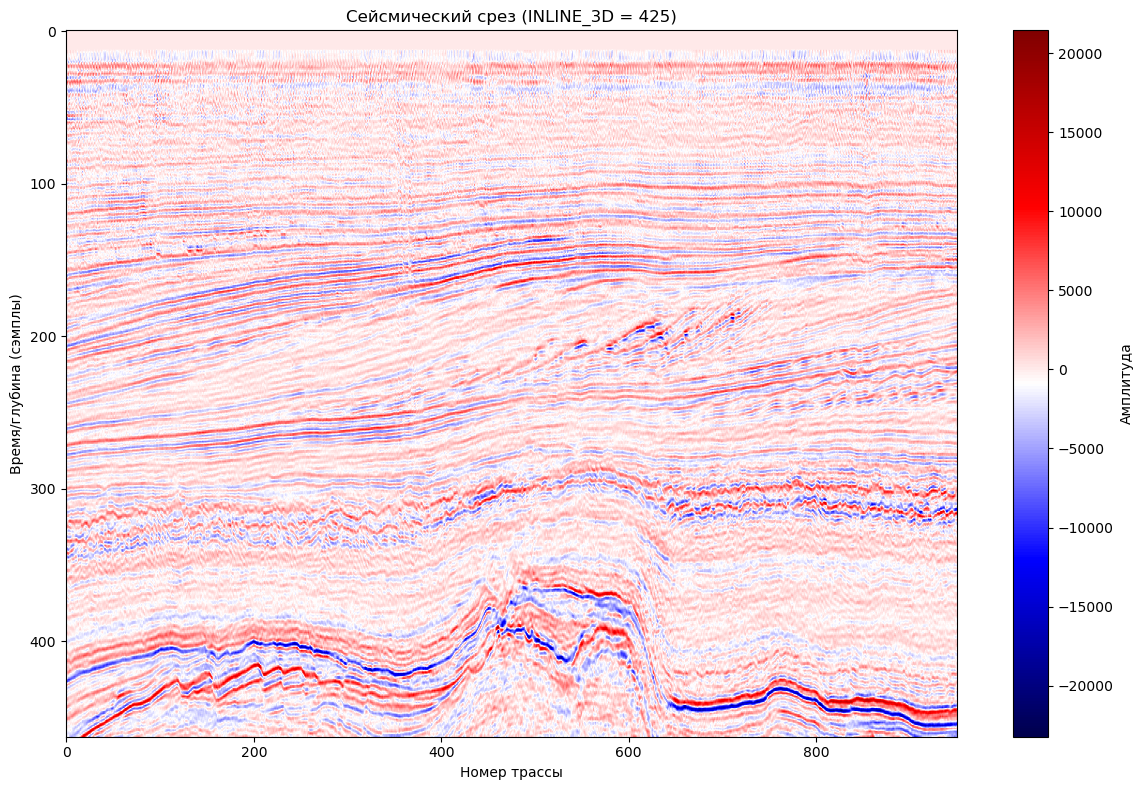

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import segfast

seq_y_fiLe_path = '/Users/admin/projects/data/seismic.sgy'

segfast_file = segfast.open(seq_y_fiLe_path, engine='memmap', 
                            ignore_geometry=False
                           )

df = segfast_file.load_headers(['INLINE_3D', 'CROSSLINE_3D'])
df.columns = ['TRACE_SEQUENCE_FILE', 'INLINE_3D', 'CROSSLINE_3D']

# Шаг 2: Определение размеров 3D записи
inline_min, inline_max = df['INLINE_3D'].min(), df['INLINE_3D'].max()
crossline_min, crossline_max = df['CROSSLINE_3D'].min(), df['CROSSLINE_3D'].max()
n_samples = segfast_file.n_samples

print(f"Размеры 3D записи:")
print(f"INLINE_3D: от {inline_min} до {inline_max}")
print(f"CROSSLINE_3D: от {crossline_min} до {crossline_max}")
print(f"Количество сэмплов: {n_samples}")

# Шаг 3: Выбор среза (по умолчанию INLINE_3D посередине)
slice_type = 'INLINE_3D'  # Можно изменить на 'CROSSLINE_3D'
if slice_type == 'INLINE_3D':
    slice_value = (inline_min + inline_max) // 2
    print(f"Выбран срез INLINE_3D = {slice_value}")
    traces_to_load = df[df['INLINE_3D'] == slice_value]['TRACE_SEQUENCE_FILE'].tolist()
else:
    slice_value = (crossline_min + crossline_max) // 2
    print(f"Выбран срез CROSSLINE_3D = {slice_value}")
    traces_to_load = df[df['CROSSLINE_3D'] == slice_value]['TRACE_SEQUENCE_FILE'].tolist()

# Шаг 4: Загрузка трасс
traces = segfast_file.load_traces(traces_to_load, buffer=None)

# Шаг 5: Преобразование в numpy array
# seismic_slice = np.array([trace.samples for trace in traces])
seismic_slice = traces

# Шаг 6: Визуализация
plt.figure(figsize=(12, 8))
plt.imshow(seismic_slice.T, cmap='seismic', aspect='auto')
plt.colorbar(label='Амплитуда')
plt.title(f"Сейсмический срез ({slice_type} = {slice_value})")
plt.xlabel('Номер трассы')
plt.ylabel('Время/глубина (сэмплы)')
plt.tight_layout()
plt.show()